In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

sys.path.insert(0, '../src')
from logistic_regression import LogisticRegression
from plotters import plot_loss, plot_image

np.random.seed(43)

In [3]:
x, y = datasets.load_digits(n_class=2, return_X_y=True, as_frame=False)

../src\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


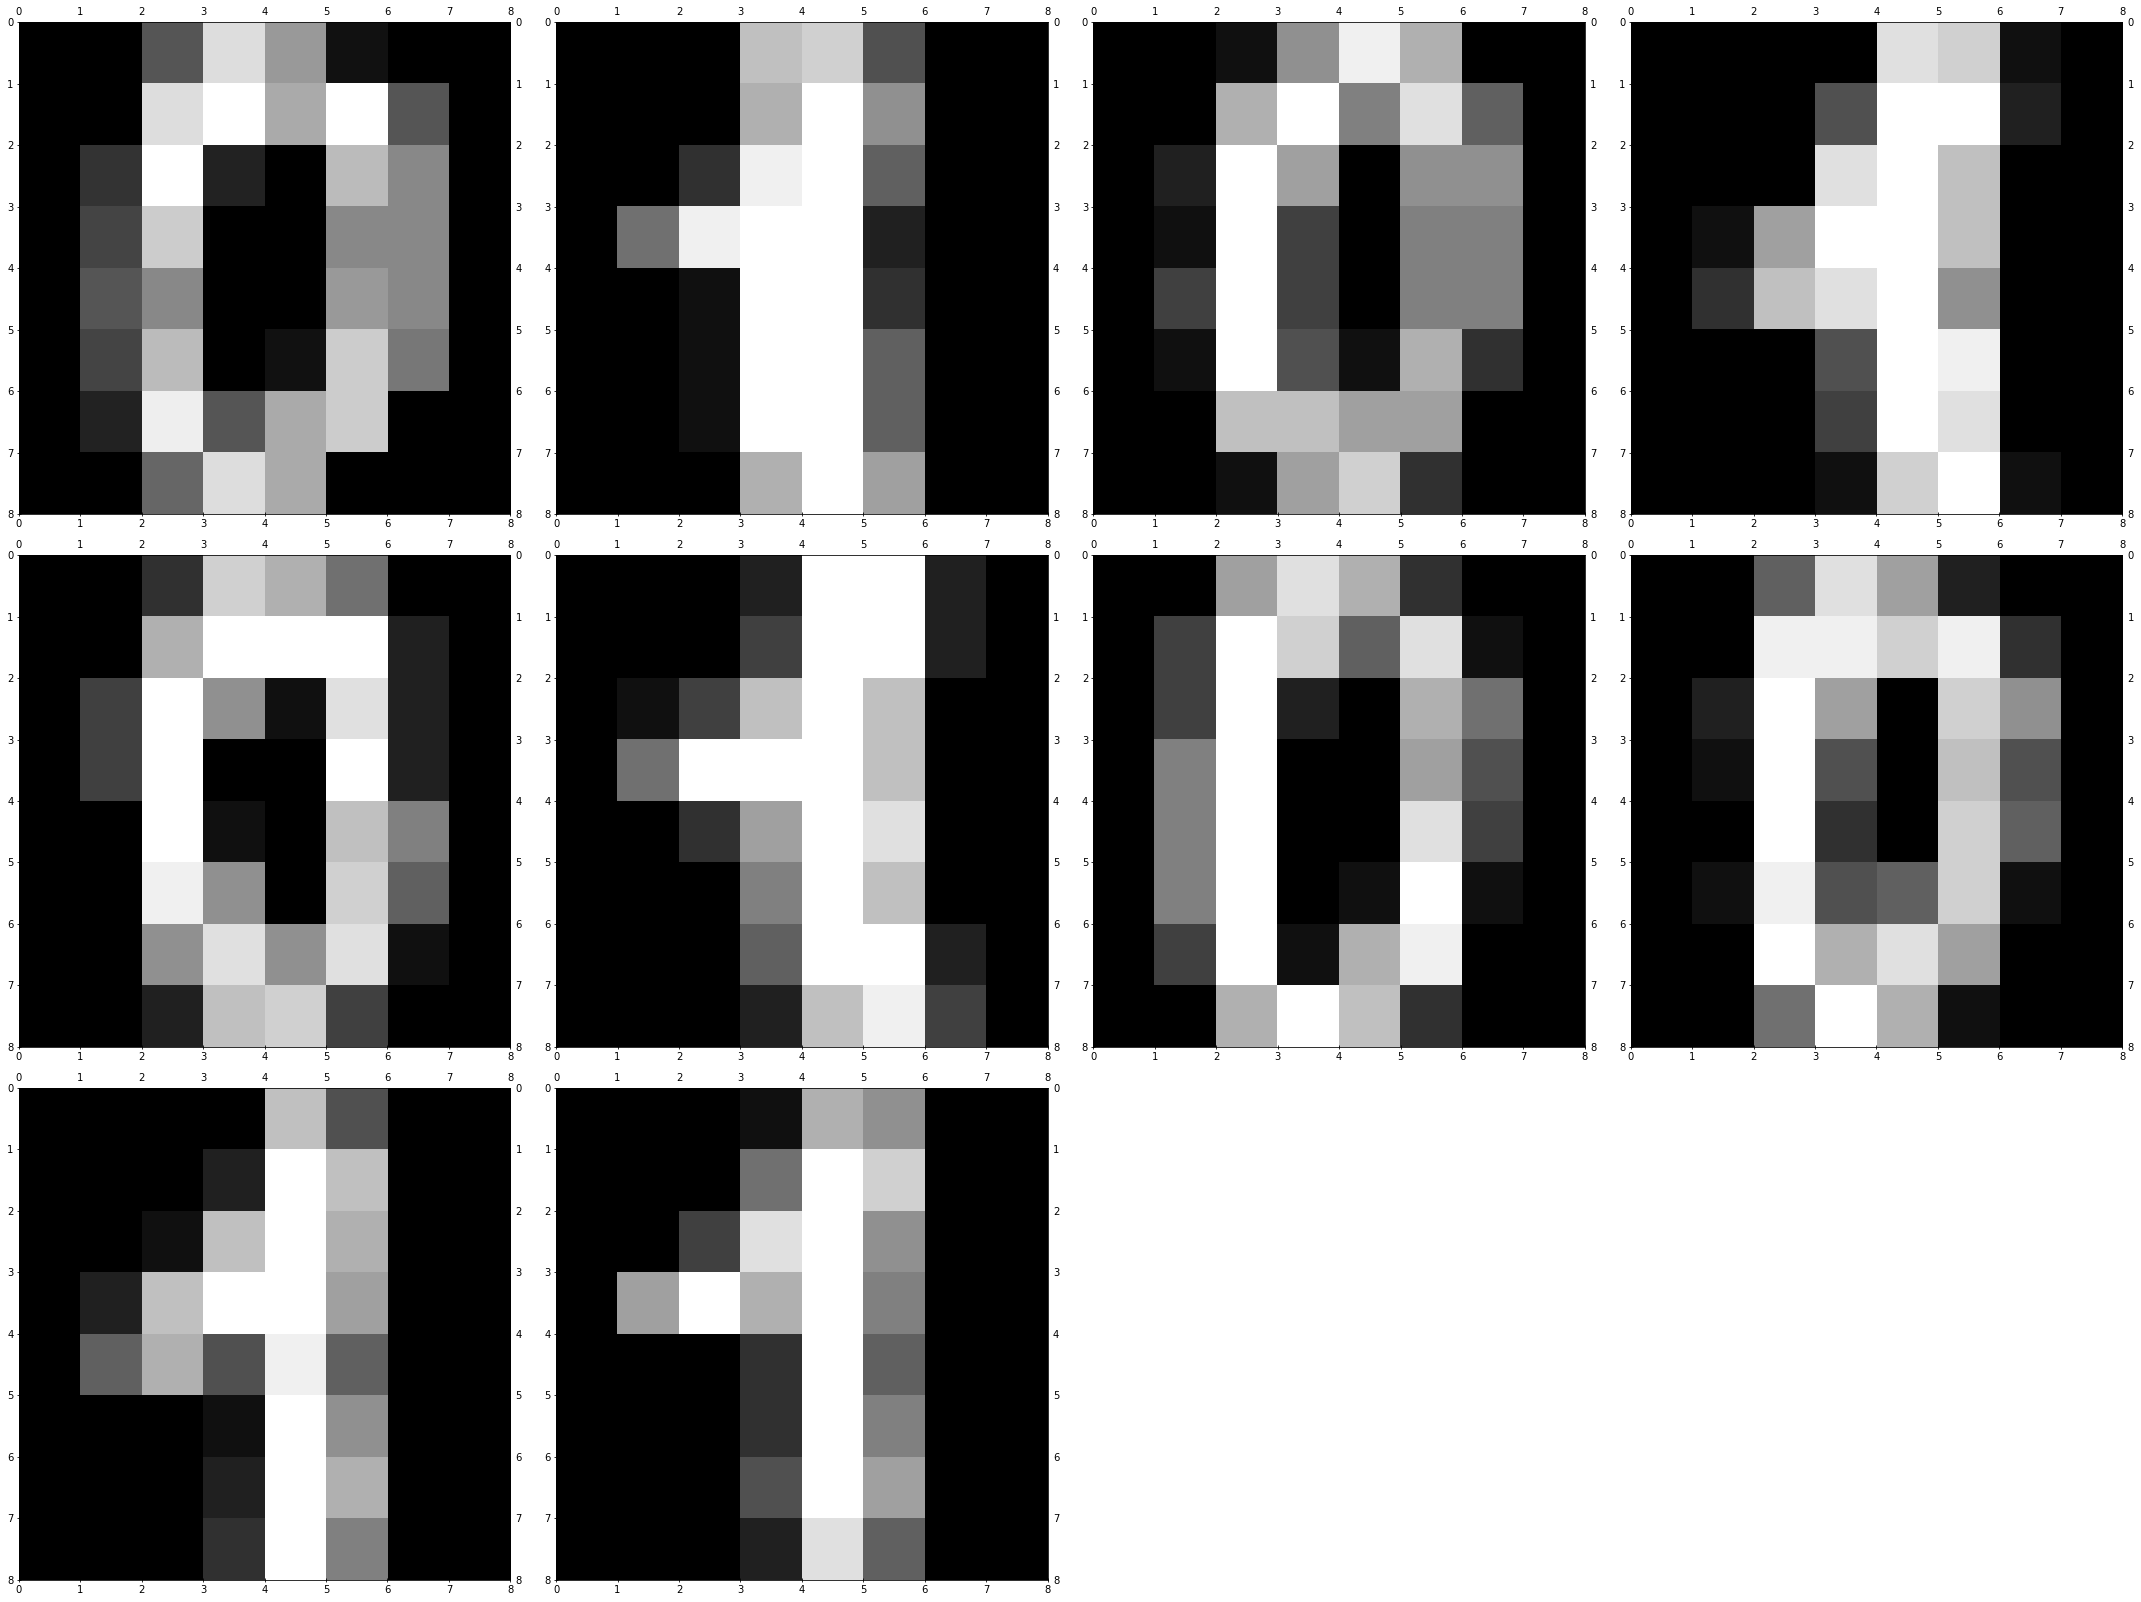

In [4]:
plot_image([x[i].reshape((8,8)).T for i in range(10)], cmap='gray', separate=True)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
def train_model(x, y, model, n_iters, batch_size):
    
    loss = []

    for i in tqdm(range(n_iters)):
        batch_idx = np.random.randint(0, x.shape[0], size=batch_size)

        batch_x = x[batch_idx]
        batch_y = y[batch_idx]

        L = model.train(batch_x, batch_y)

        loss.append(L)
        if i == 2000:
            model.lr /= 100
    return loss

In [154]:
# metrics = []
# for _ in range(10):
#     model = LogisticRegression(1, lr=1e-2)
#     loss = train_model(x_train.reshape(-1, 1), y_train, model, 6000, 32)
# #     plot_loss(np.array(loss), figsize=(16,8), final_mean=None)
#     metrics.append(model.evaluate(x_test.reshape(-1, 1), y_test))
# np.mean(metrics).round(3)

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

0.042

  0%|          | 0/2000 [00:00<?, ?it/s]

../src\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.03142828638941371

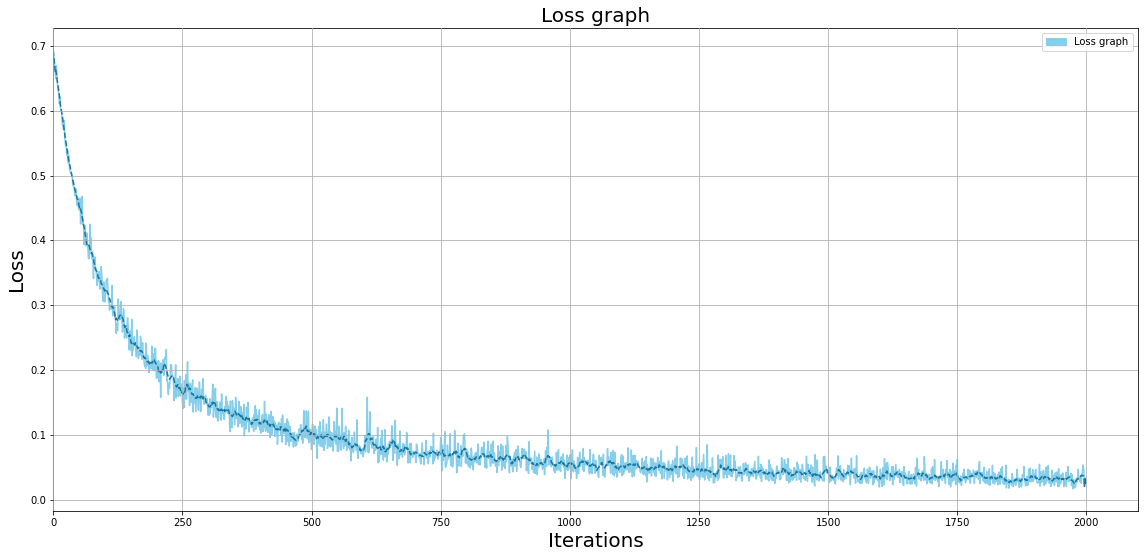

In [15]:
model = LogisticRegression(64, lr=1e-6)
loss = train_model(x_train, y_train, model, 2000, 32)
plot_loss(np.array(loss), figsize=(16,8), final_mean=None)
model.evaluate(x_test, y_test)

../src\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


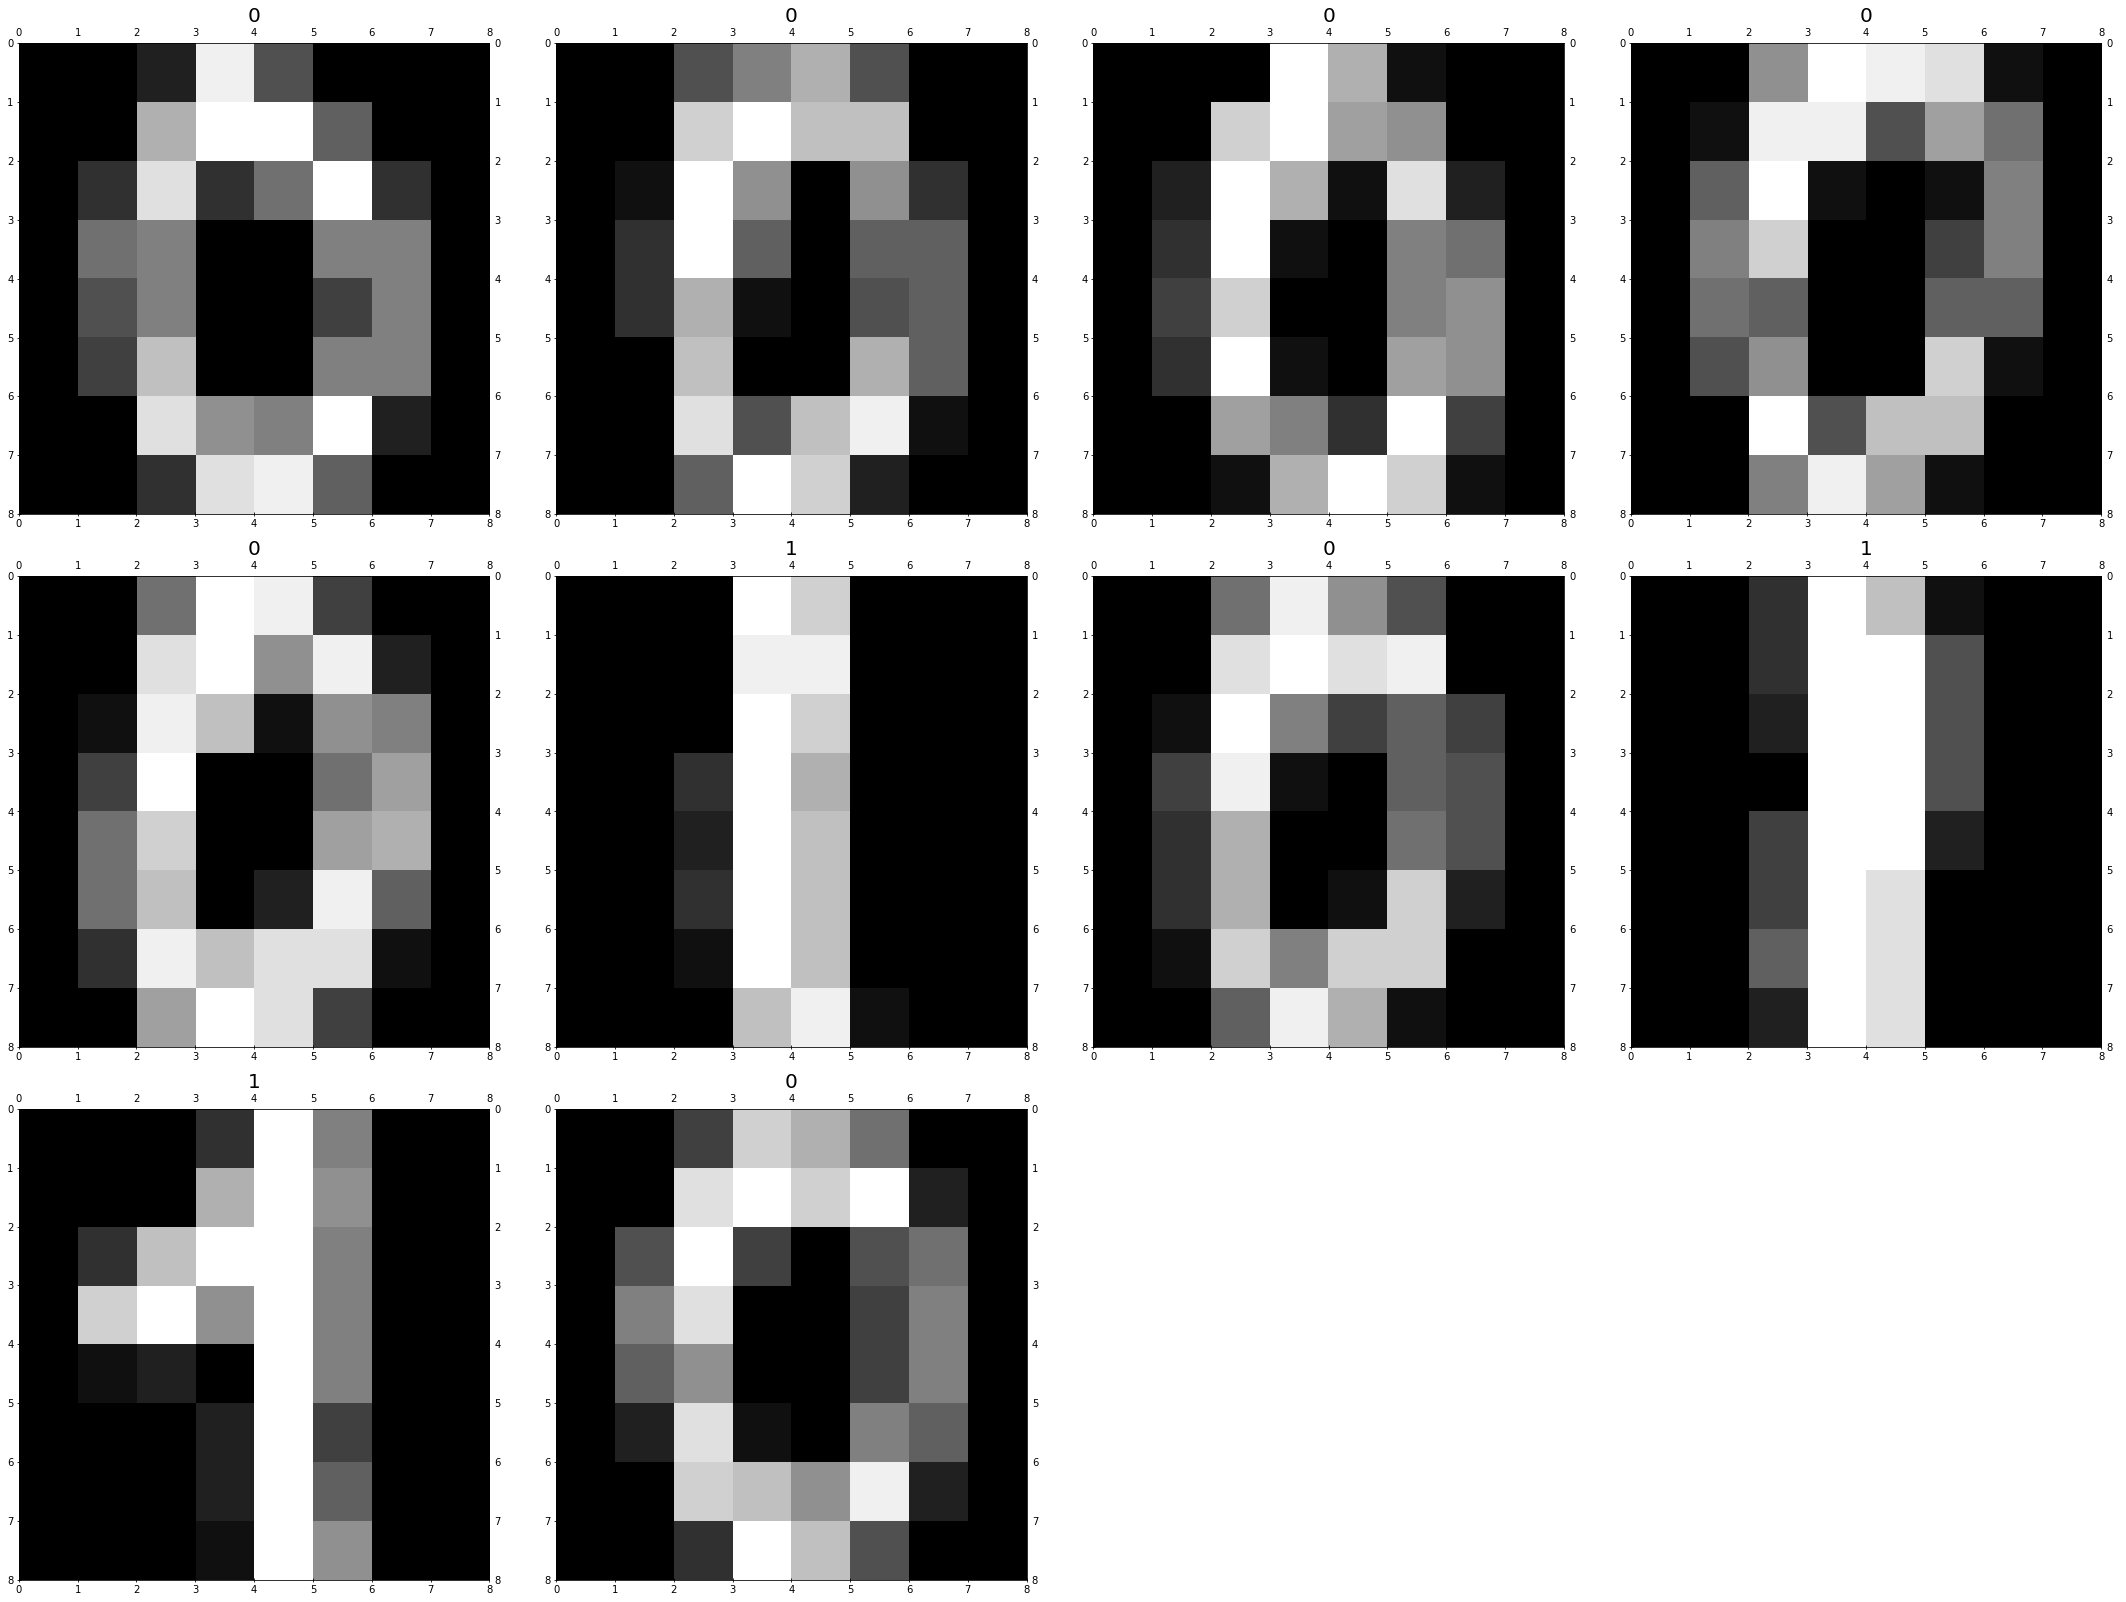

In [40]:
y_h_test = model.forward(x_test).squeeze()
y_h_test = (y_h_test > 0.5).astype(np.int32)

plot_data = [x_test[i].reshape((8,8)).T for i in range(10)]
plot_title = [str(i) for i in y_h_test[0:10]]
plot_image(plot_data, title=plot_title, cmap='gray', separate=True)

In [36]:
def accuracy(y, y_h):
    tp_and_tn = (y==y_h).sum()
    return tp_and_tn/y.shape[0]


In [37]:
accuracy(y_test, y_h_test)

1.0

In [38]:
y_h_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

In [39]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])